# Bayesian statistics

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# The Monty Hall problem

The Monty Hall problem is a probability puzzle based on the American television game show Let's Make a Deal. The name comes from the show's host, Monty Hall.

The problem is stated as follows:
- You are a contestant on a game show. The host, Monty Hall, shows you three doors.
- Behind one of the doors is a car, and behind the other two doors are goats.
- You are asked to pick a door. After you pick, Monty opens one of the remaining two doors to reveal a goat.
- Monty then asks if you would like to switch doors.
- The question is, should you switch doors?

In [2]:
# Let us simulate the Monty Hall problem

# Function defining one realization of the monty_hall problem
# We will generate random integers between 0 and n_doors to represent the doors, using stats.category.rvs() function.
# We will chose one of the doors at random, using stats.randint.rvs() function.
# We will then check if the car is behind the door chosen by the contestant.
# If the car is behind the door chosen by the contestant, the contestant wins if they stay with their original choice.
# If the car is not behind the door chosen by the contestant, Monty will open one of the remaining doors to reveal a goat.

# We will randomly choose one of the remaining doors to reveal a goat, using stats.randint.rvs() function.
# We will then choose one of the remaining doors that does not have the car behind it.
# We will switch the choice to the remaining door.
# We will check if the car is behind the door chosen by the contestant.
# If the car is behind the door chosen by the contestant, the contestant wins if they switch doors.
# If the car is not behind the door chosen by the contestant, the contestant loses if they switch doors.

# The function will return the number of wins if we switch doors and the number of wins if we stay with our original choice, as a tuple.
def monty_hall(n_doors=3):
    " Simulate one realization of the Monty Hall problem "
    " output: (number of wins if we switch doors, number of wins if we stay with our original choice)"
    
    # Randomly select the door with the car behind it, using scipy.stats.randint.rvs() function
    # Initialize the doors array
    doors = np.zeros(n_doors)

    # Randomly select the door with the car behind it
    doors[stats.randint.rvs(0, n_doors)] = 1

    # Player chooses one of the doors at random
    choice = stats.randint.rvs(0, n_doors)

    # Check if the car is behind the door chosen by the contestant
    if doors[choice] == 1:
        # If the car is behind the door chosen by the contestant, the contestant wins if they stay with their original choice
        return 0, 1
    else:
        # If the car is not behind the door chosen by the contestant, the contestant loses if they stay with their original choice
        # Monty will open one of the remaining doors to reveal a goat
        # Randomly select the door to reveal a goat
        goat = stats.randint.rvs(0, n_doors)
        while goat == choice or doors[goat] == 1:
            goat = stats.randint.rvs(0, n_doors)

        # Switch the choice to the remaining door
        choice = [door for door in range(n_doors) if door != choice and door != goat][0]

        # Check if the car is behind the door chosen by the contestant
        if doors[choice] == 1:
            # If the car is behind the door chosen by the contestant, the contestant wins if they switch doors
            return 1, 0
        else:
            # If the car is not behind the door chosen by the contestant, the contestant loses if they switch doors
            return 0, 0
        

In [3]:
# We will simulate the Monty Hall problem using a function that takes the number of simulations as an input.
# The function will return the probability of winning if you switch doors and the probability of winning if you stay with your original choice.
def monty_hall_simulations(n_simulations, n_doors=3):
    # Initialize the number of wins if we switch doors and the number of wins if we stay with our original choice
    wins_switch = 0
    wins_stay = 0
    # Repeat the process for the number of simulations specified
    for i in range(n_simulations):
        # Calculate the number of wins if we switch doors and the number of wins if we stay with our original choice
        win_switch, win_stay = monty_hall(n_doors)
        wins_switch += win_switch
        wins_stay += win_stay

    # Calculate the probability of winning if we switch doors and the probability of winning if we stay with our original choice
    prob_switch = wins_switch / n_simulations
    prob_stay = wins_stay / n_simulations
    # Return the probabilities as a tuple
    return prob_switch, prob_stay

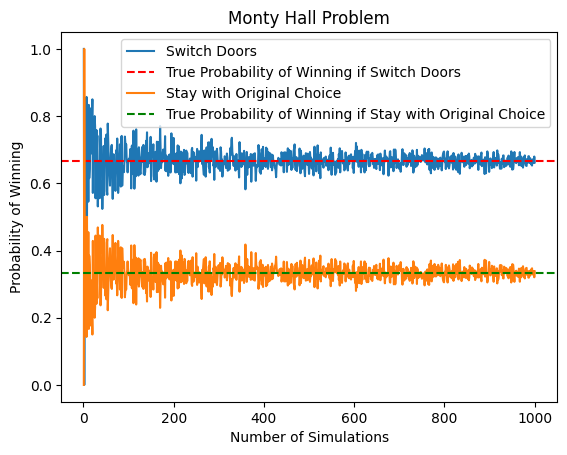

In [4]:
# Let us plot the probabilities of winning if we switch doors and if we stay with our original choice for different number of simulations
# We will use the monty_hall_simulations() function to calculate the probabilities for different number of simulations.

# Set the number of simulations
n_simulations = 1000
# Initialize the list of probabilities of winning if we switch doors and if we stay with our original choice
prob_switch_list = np.zeros(n_simulations)
prob_stay_list = np.zeros(n_simulations)
# Repeat the process for different number of simulations
for i in range(n_simulations):
    # Calculate the probabilities of winning if we switch doors and if we stay with our original choice
    prob_switch, prob_stay = monty_hall_simulations(i+1)
    prob_switch_list[i] = prob_switch
    prob_stay_list[i] = prob_stay

# Plot the probabilities of winning if we switch doors and if we stay with our original choice for different number of simulations
plt.plot(range(1, n_simulations+1), prob_switch_list, label='Switch Doors')
# True probability of winning if we switch doors is 2/3
plt.axhline(y=2/3, color='r', linestyle='--', label='True Probability of Winning if Switch Doors')
plt.plot(range(1, n_simulations+1), prob_stay_list, label='Stay with Original Choice')
# True probability of winning if we stay with our original choice is 1/3
plt.axhline(y=1/3, color='g', linestyle='--', label='True Probability of Winning if Stay with Original Choice')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Winning')
plt.title('Monty Hall Problem')
plt.legend()
plt.show()
